# Proyecto Analitica Equipo 2

## Conjunto de datos de beneficiarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting


In [2]:
# Carga los conjuntos de datos en objetos DataFrame
df1 = pd.read_csv('/Users/coby/Library/CloudStorage/OneDrive-InstitutoPolitecnicoNacional/ESCOM/Sexto Semestre/Analitica/archive(3)/Train_Beneficiarydata-1542865627584.csv')
df2 = pd.read_csv('/Users/coby/Library/CloudStorage/OneDrive-InstitutoPolitecnicoNacional/ESCOM/Sexto Semestre/Analitica/archive(3)/Train_Inpatientdata-1542865627584.csv')
df3 = pd.read_csv('/Users/coby/Library/CloudStorage/OneDrive-InstitutoPolitecnicoNacional/ESCOM/Sexto Semestre/Analitica/archive(3)/Train_Outpatientdata-1542865627584.csv')
df4 = pd.read_csv('/Users/coby/Library/CloudStorage/OneDrive-InstitutoPolitecnicoNacional/ESCOM/Sexto Semestre/Analitica/archive(3)/Train-1542865627584.csv')

# Fusiona df1 y df2
merged_df = df3.merge(df4, on='Provider')

# Fusiona merged_df y df3
merged_df = merged_df.merge(df2, on='BeneID')

# Fusiona merged_df y df4
data = merged_df.merge(df1, on='BeneID')

# Imprime el DataFrame resultante
print(data)


            BeneID  ClaimID_x ClaimStartDt_x ClaimEndDt_x Provider_x  \
0        BENE11182  CLM706371     2009-11-30   2009-11-30   PRV56011   
1        BENE11182  CLM748099     2009-12-28   2009-12-28   PRV56011   
2        BENE11182  CLM508103     2009-08-05   2009-08-06   PRV55951   
3        BENE11581  CLM307012     2009-04-16   2009-04-16   PRV56011   
4        BENE11581  CLM314437     2009-04-20   2009-04-20   PRV56011   
...            ...        ...            ...          ...        ...   
173577  BENE141604  CLM230221     2009-03-05   2009-03-05   PRV54307   
173578  BENE135437  CLM752105     2009-12-30   2009-12-30   PRV53589   
173579  BENE135437  CLM752105     2009-12-30   2009-12-30   PRV53589   
173580  BENE155548  CLM133534     2009-01-12   2009-01-15   PRV53206   
173581  BENE155548  CLM485611     2009-07-23   2009-07-23   PRV53206   

        InscClaimAmtReimbursed_x AttendingPhysician_x OperatingPhysician_x  \
0                             60            PHY311407    

In [3]:
merged_df.isnull().sum()

BeneID                           0
ClaimID_x                        0
ClaimStartDt_x                   0
ClaimEndDt_x                     0
Provider_x                       0
InscClaimAmtReimbursed_x         0
AttendingPhysician_x           639
OperatingPhysician_x        141554
OtherPhysician_x            114263
ClmDiagnosisCode_1_x          3352
ClmDiagnosisCode_2_x         61811
ClmDiagnosisCode_3_x        100642
ClmDiagnosisCode_4_x        127119
ClmDiagnosisCode_5_x        145422
ClmDiagnosisCode_6_x        154600
ClmDiagnosisCode_7_x        160315
ClmDiagnosisCode_8_x        164023
ClmDiagnosisCode_9_x        167304
ClmDiagnosisCode_10_x       173158
ClmProcedureCode_1_x        173514
ClmProcedureCode_2_x        173565
ClmProcedureCode_3_x        173581
ClmProcedureCode_4_x        173581
ClmProcedureCode_5_x        173582
ClmProcedureCode_6_x        173582
DeductibleAmtPaid_x              0
ClmAdmitDiagnosisCode_x     134295
PotentialFraud                   0
ClaimID_y           

In [4]:
import re

def obtener_numero_id(id_alfa):
    numero_id = re.findall(r'\d+', id_alfa)
    return int(numero_id[0]) if numero_id else 0

# Ordena el DataFrame por el número en el ID alfanumérico
df_ordenado = data.loc[sorted(data.index, key=lambda x: obtener_numero_id(data.loc[x, 'BeneID']))]

print(df_ordenado)


            BeneID  ClaimID_x ClaimStartDt_x ClaimEndDt_x Provider_x  \
7460     BENE11011  CLM144521     2009-01-18   2009-01-18   PRV52314   
7461     BENE11011  CLM347780     2009-05-08   2009-05-08   PRV51012   
7462     BENE11011  CLM507201     2009-08-04   2009-08-04   PRV51063   
9509     BENE11014  CLM523157     2009-08-13   2009-08-13   PRV56835   
10447    BENE11017  CLM110718     2008-12-19   2009-01-03   PRV54786   
...            ...        ...            ...          ...        ...   
40387   BENE159177  CLM343209     2009-05-05   2009-05-05   PRV56729   
40388   BENE159177  CLM343209     2009-05-05   2009-05-05   PRV56729   
132333  BENE159188  CLM499056     2009-07-30   2009-07-30   PRV54778   
132334  BENE159188  CLM647809     2009-10-24   2009-10-24   PRV54778   
132335  BENE159188  CLM401336     2009-06-06   2009-06-08   PRV54765   

        InscClaimAmtReimbursed_x AttendingPhysician_x OperatingPhysician_x  \
7460                          50            PHY379398    

In [5]:
Datos= 'data.csv'
data.to_csv(Datos, index=False)

In [6]:
data.isnull().sum()

BeneID                      0
ClaimID_x                   0
ClaimStartDt_x              0
ClaimEndDt_x                0
Provider_x                  0
                           ..
ChronicCond_stroke          0
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
Length: 81, dtype: int64

In [7]:
DataP = data.interpolate()
df = DataP


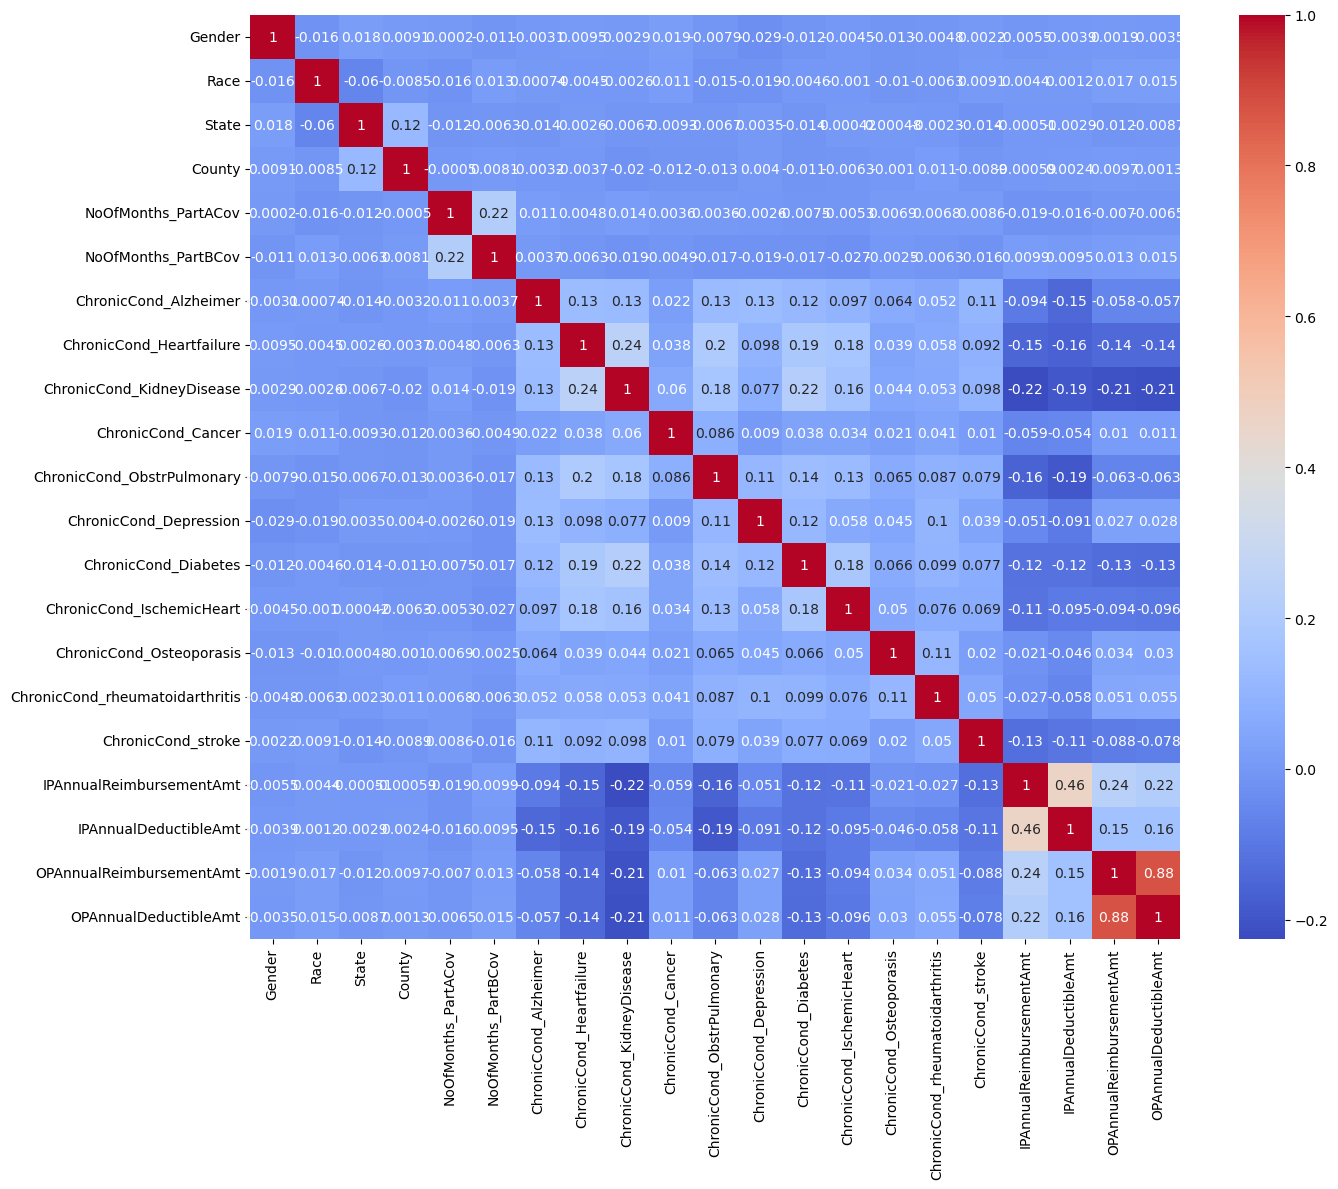

In [8]:
MatrizCorrelacion = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(DataP[['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].corr(), cmap='coolwarm', annot=True)
plt.show()

In [9]:
# Seleccionar las columnas
columns = ['BeneID', 'ClaimID_x', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider_x',
           'InscClaimAmtReimbursed_x', 'AttendingPhysician_x', 'OperatingPhysician_x',
           'OtherPhysician_x', 'ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x',
           'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x',
           'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x',
           'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x', 'ClmProcedureCode_1_x',
           'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x',
           'ClmProcedureCode_5_x', 'ClmProcedureCode_6_x', 'DeductibleAmtPaid_x',
           'ClmAdmitDiagnosisCode_x', 'PotentialFraud', 'ClaimID_y', 'ClaimStartDt_y',
           'ClaimEndDt_y', 'Provider_y', 'InscClaimAmtReimbursed_y', 'AttendingPhysician_y',
           'OperatingPhysician_y', 'OtherPhysician_y', 'AdmissionDt', 'ClmAdmitDiagnosisCode_y',
           'DeductibleAmtPaid_y', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1_y',
           'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y',
           'ClmDiagnosisCode_5_y', 'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y',
           'ClmDiagnosisCode_8_y', 'ClmDiagnosisCode_9_y', 'ClmDiagnosisCode_10_y',
           'ClmProcedureCode_1_y', 'ClmProcedureCode_2_y', 'ClmProcedureCode_3_y',
           'ClmProcedureCode_4_y', 'ClmProcedureCode_5_y', 'ClmProcedureCode_6_y',
           'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
           'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
           'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
           'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes',
           'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
           'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
           'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',]

# Seleccionar las columnas relevantes del DataFrame
relevant_data = DataP[columns]

# Calcular la matriz de correlación
correlation_matrix = relevant_data.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)


                                 InscClaimAmtReimbursed_x  \
InscClaimAmtReimbursed_x                         1.000000   
ClmProcedureCode_1_x                            -0.009078   
ClmProcedureCode_2_x                            -0.001070   
ClmProcedureCode_3_x                                  NaN   
ClmProcedureCode_4_x                                  NaN   
ClmProcedureCode_5_x                                  NaN   
ClmProcedureCode_6_x                                  NaN   
DeductibleAmtPaid_x                              0.293893   
InscClaimAmtReimbursed_y                         0.067464   
DeductibleAmtPaid_y                                   NaN   
ClmProcedureCode_1_y                            -0.000349   
ClmProcedureCode_2_y                             0.004356   
ClmProcedureCode_3_y                            -0.001853   
ClmProcedureCode_4_y                            -0.004500   
ClmProcedureCode_5_y                             0.005001   
ClmProcedureCode_6_y    

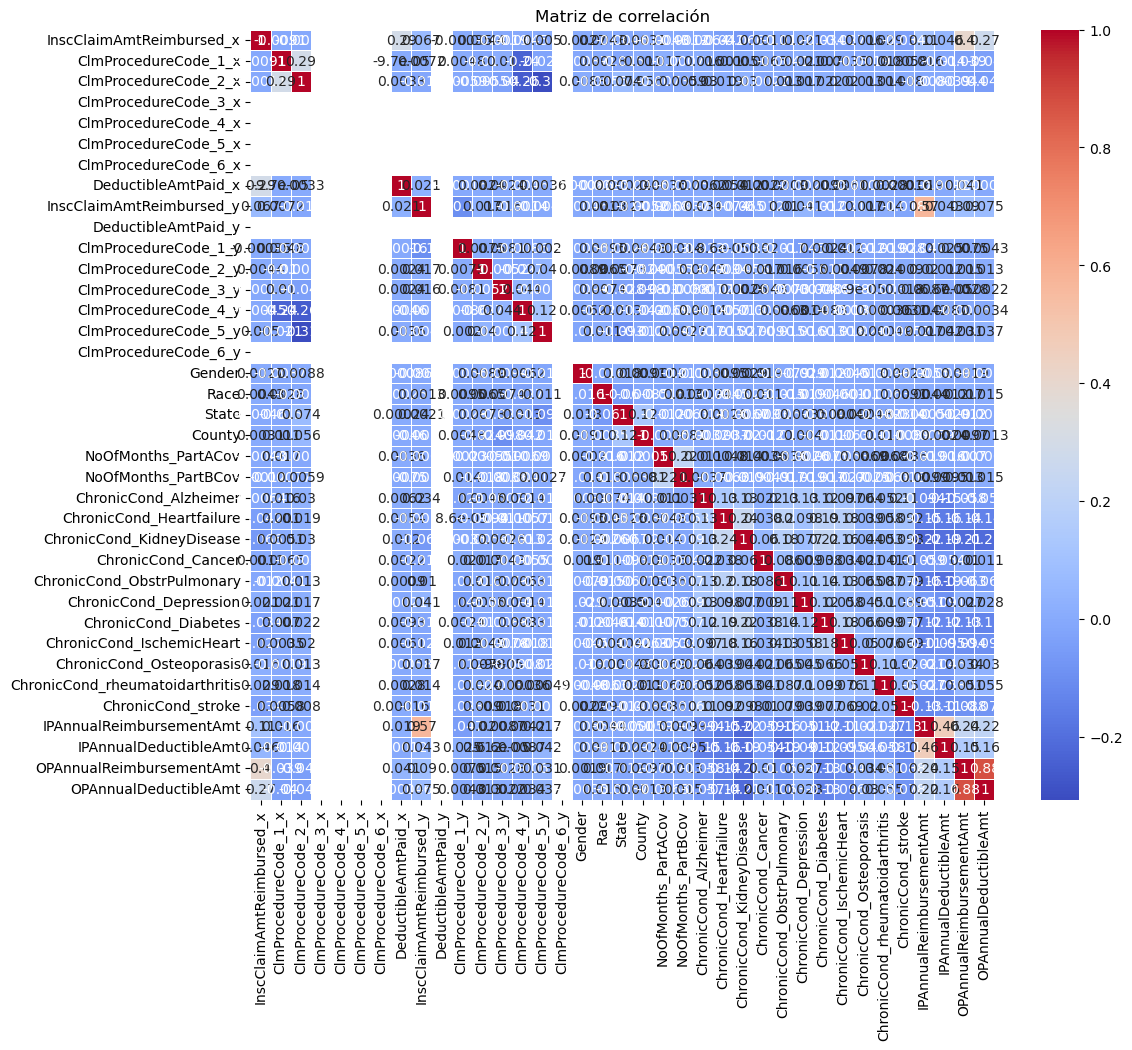

In [10]:
# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

In [11]:
print(DataP.columns)


Index(['BeneID', 'ClaimID_x', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider_x',
       'InscClaimAmtReimbursed_x', 'AttendingPhysician_x',
       'OperatingPhysician_x', 'OtherPhysician_x', 'ClmDiagnosisCode_1_x',
       'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x',
       'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x',
       'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x',
       'ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x',
       'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x', 'ClmProcedureCode_6_x',
       'DeductibleAmtPaid_x', 'ClmAdmitDiagnosisCode_x', 'PotentialFraud',
       'ClaimID_y', 'ClaimStartDt_y', 'ClaimEndDt_y', 'Provider_y',
       'InscClaimAmtReimbursed_y', 'AttendingPhysician_y',
       'OperatingPhysician_y', 'OtherPhysician_y', 'AdmissionDt',
       'ClmAdmitDiagnosisCode_y', 'DeductibleAmtPaid_y', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1_y',

In [12]:
DataP

,BeneID,ClaimID_x,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11182,CLM706371,2009-11-30,2009-11-30,PRV56011,60,PHY311407,NaN,NaN,V1303,...,1,2,1,1,2,1,5200,1068,270,30
1,BENE11182,CLM748099,2009-12-28,2009-12-28,PRV56011,10,PHY402056,NaN,NaN,28981,...,1,2,1,1,2,1,5200,1068,270,30
2,BENE11182,CLM508103,2009-08-05,2009-08-06,PRV55951,200,PHY320515,PHY320515,NaN,73302,...,1,2,1,1,2,1,5200,1068,270,30
3,BENE11581,CLM307012,2009-04-16,2009-04-16,PRV56011,500,PHY346833,PHY340882,PHY346833,V7612,...,2,2,1,1,2,2,26000,1068,2490,860
4,BENE11581,CLM314437,2009-04-20,2009-04-20,PRV56011,20,PHY316154,NaN,NaN,28521,...,2,2,1,1,2,2,26000,1068,2490,860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173577,BENE141604,CLM230221,2009-03-05,2009-03-05,PRV54307,300,PHY392566,PHY392566,NaN,59801,...,2,1,1,1,1,2,20860,3204,1060,280
173578,BENE135437,CLM752105,2009-12-30,2009-12-30,PRV53589,300,PHY342091,NaN,NaN,78962,...,1,1,1,2,2,2,111400,1068,700,160
173579,BENE135437,CLM752105,2009-12-30,2009-12-30,PRV53589,300,PHY342091,NaN,NaN,78962,...,1,1,1,2,2,2,111400,1068,700,160
173580,BENE155548,CLM133534,2009-01-12,2009-01-15,PRV53206,0,PHY406927,PHY406927,NaN,99931,...,1,1,1,2,1,2,11280,1068,1100,850


# KNN

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Definir las características (X) y la variable objetivo (y)
X = DataP.select_dtypes(include='number')
y = DataP['PotentialFraud']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA
pca = PCA(n_components=12)  # Especificar el número de componentes principales deseado
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de k-NN
k = 2  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = knn.score(X_test, y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Generar predicciones para la variable y
y_pred_all = knn.predict(X_pca)
DataP['PotentialFraud'] = y_pred_all

# Imprimir la predicción
print("Predicción de la variable y:")
print(y_pred_all)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Precisión del modelo: 75.84%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicción de la variable y:
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']


    Importación de las bibliotecas necesarias:
        train_test_split de sklearn.model_selection: Permite dividir los datos en conjuntos de entrenamiento y prueba.
        KNeighborsClassifier de sklearn.neighbors: Es la clase que implementa el algoritmo k-NN para la clasificación.
        StandardScaler de sklearn.preprocessing: Permite escalar los datos para que tengan media cero y varianza unitaria.
        PCA de sklearn.decomposition: Se utiliza para realizar análisis de componentes principales (PCA) y reducir la dimensionalidad de los datos.
        SimpleImputer de sklearn.impute: Permite imputar (rellenar) los valores faltantes en los datos.

    Definición de las características (X) y la variable objetivo (y):
        X se selecciona a partir de los datos DataP y se incluyen solo las columnas numéricas.
        y se selecciona a partir de los datos DataP y se toma la columna "PotentialFraud".

    Imputación de valores faltantes:
        Se utiliza SimpleImputer para reemplazar los valores faltantes en X con la media de cada columna.
        Los valores faltantes se reemplazan por la media utilizando la estrategia 'mean' (media).

    Escalado de datos:
        StandardScaler se utiliza para escalar los datos X_imputed de manera que tengan media cero y varianza unitaria.
        Esto es importante para asegurar que todas las características tengan el mismo rango de valores y evitar sesgos en el modelo.

    Aplicación de PCA:
        PCA se utiliza para reducir la dimensionalidad de los datos X_scaled a un número especificado de componentes principales.
        Se especifica n_components=12 para reducir las características a 12 componentes principales.

    División de los datos en conjuntos de entrenamiento y prueba:
        train_test_split se utiliza para dividir los datos X_pca y y en conjuntos de entrenamiento y prueba.
        Se utiliza test_size=0.2 para que el 20% de los datos se utilice como conjunto de prueba.
        Se utiliza random_state=42 para garantizar la reproducibilidad de la división.

    Creación y ajuste del modelo k-NN:
        Se crea una instancia del clasificador KNeighborsClassifier con n_neighbors=2, lo que indica que se utilizarán 2 vecinos más cercanos para la clasificación.
        El modelo se ajusta utilizando los conjuntos de entrenamiento X_train y y_train.

    Realización de predicciones en el conjunto de prueba:
        Se utilizan los datos X_test para realizar predicciones utilizando el modelo k-NN ajustado.
        Las predicciones se almacenan en y_pred.

    Evaluación del rendimiento del modelo:
        Se calcula la precisión del modelo utilizando score en los datos de prueba X_test y y_test.
        La precisión se imprime en formato porcentaje.

    Generación de predicciones para la variable y:
        Se utilizan los datos X_pca para generar predicciones para la variable y utilizando el modelo k-NN.
        Las predicciones se almacenan en y_pred_all.
        Las predicciones también se actualizan en el DataFrame DataP en la columna "PotentialFraud".

    Impresión de la predicción:
        Se imprime la predicción de la variable y en formato de DataFrame.

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Definir el modelo de k-NN
k = 2  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)

# Definir el número de folds y la estrategia de división
n_folds = 10
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Realizar la evaluación utilizando 10-Fold Cross-Validation Estratificado
scores = cross_val_score(knn, X_pca, y, cv=cv)

# Imprimir los resultados
print("Resultados de 10-Fold Cross-Validation Estratificado:")
print("Precisión promedio: {:.2f}%".format(np.mean(scores) * 100))
print("Desviación estándar: {:.2f}%".format(np.std(scores) * 100))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Resultados de 10-Fold Cross-Validation Estratificado:
Precisión promedio: 76.59%
Desviación estándar: 0.31%


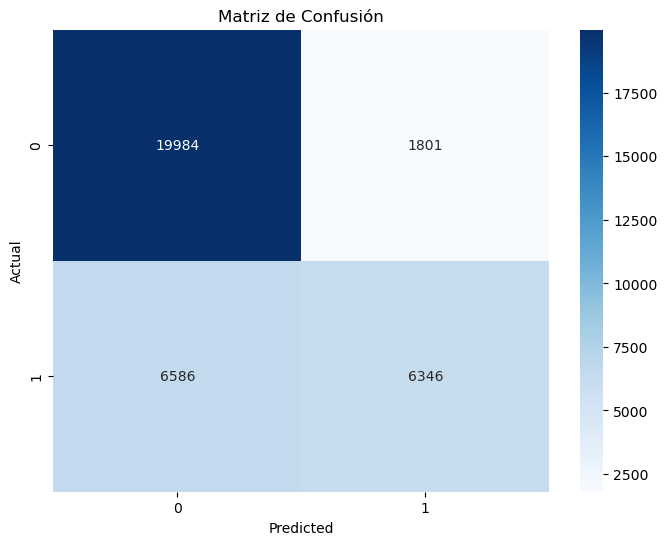

Métricas de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83     21785
           1       0.78      0.49      0.60     12932

    accuracy                           0.76     34717
   macro avg       0.77      0.70      0.71     34717
weighted avg       0.76      0.76      0.74     34717



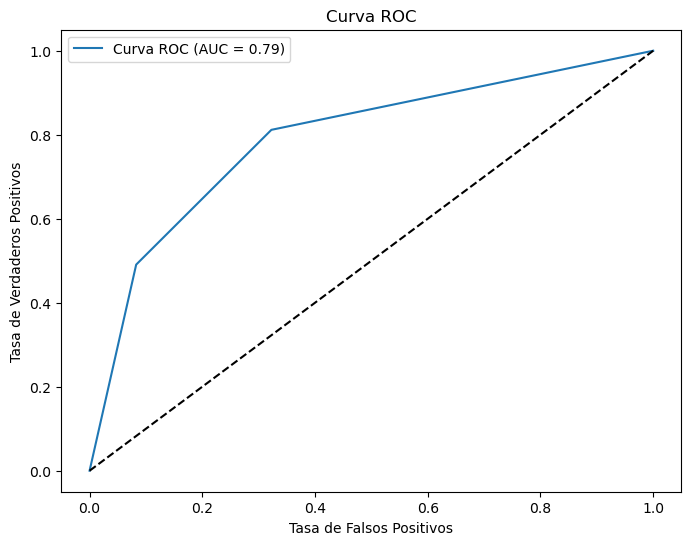

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Convertir los valores de y_test a binarios numéricos
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

# Convertir los valores de y_pred a binarios numéricos
y_pred_binary = le.transform(y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Calcular métricas de clasificación (precisión, recall, F1-score)
classification_metrics = classification_report(y_test_binary, y_pred_binary, zero_division=1)  # Agregar el parámetro zero_division

# Ajustar el clasificador KNeighborsClassifier
knn.fit(X_train, y_train)

# Calcular la curva ROC y el área bajo la curva (AUC)
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
auc = roc_auc_score(y_test_binary, y_pred_prob)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Visualizar las métricas de clasificación
print("Métricas de Clasificación:")
print(classification_metrics)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [16]:
X

,InscClaimAmtReimbursed_x,ClmProcedureCode_1_x,ClmProcedureCode_2_x,ClmProcedureCode_3_x,ClmProcedureCode_4_x,ClmProcedureCode_5_x,ClmProcedureCode_6_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,DeductibleAmtPaid_y,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,60,NaN,NaN,NaN,NaN,NaN,NaN,0,4000,1068.0,...,1,2,1,1,2,1,5200,1068,270,30
1,10,NaN,NaN,NaN,NaN,NaN,NaN,0,4000,1068.0,...,1,2,1,1,2,1,5200,1068,270,30
2,200,NaN,NaN,NaN,NaN,NaN,NaN,0,4000,1068.0,...,1,2,1,1,2,1,5200,1068,270,30
3,500,NaN,NaN,NaN,NaN,NaN,NaN,0,26000,1068.0,...,2,2,1,1,2,2,26000,1068,2490,860
4,20,NaN,NaN,NaN,NaN,NaN,NaN,0,26000,1068.0,...,2,2,1,1,2,2,26000,1068,2490,860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173577,300,9952.0,9971.0,2724.0,311.0,NaN,NaN,0,6000,1068.0,...,2,1,1,1,1,2,20860,3204,1060,280
173578,300,9952.0,9971.0,2724.0,311.0,NaN,NaN,0,57000,1068.0,...,1,1,1,2,2,2,111400,1068,700,160
173579,300,9952.0,9971.0,2724.0,311.0,NaN,NaN,0,50000,1068.0,...,1,1,1,2,2,2,111400,1068,700,160
173580,0,9952.0,9971.0,2724.0,311.0,NaN,NaN,0,11000,1068.0,...,1,1,1,2,1,2,11280,1068,1100,850


In [17]:
y

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
173577     No
173578     No
173579     No
173580     No
173581     No
Name: PotentialFraud, Length: 173582, dtype: object

# Random Forest

In [18]:
DataR = df

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Definir las características (X) y la variable objetivo (y)
X = DataR.select_dtypes(include='number')
DataR.reset_index(drop=True, inplace=True)
y = DataR['PotentialFraud']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA
pca = PCA(n_components=12)  # Especificar el número de componentes principales deseado
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = random_forest.score(X_test, y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Generar predicciones para la variable y
y_pred_all = random_forest.predict(X_pca)
DataP['PotentialFraud'] = y_pred_all

# Imprimir la predicción
print("Predicción de la variable y:")
print(y_pred_all)


Precisión del modelo: 93.41%
Predicción de la variable y:
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']


In [ ]:
# Realizar evaluación utilizando 10-fold cross-validation estratificado
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []

# Calcular el promedio de las precisiones obtenidas
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Precisión promedio del modelo: {:.2f}%".format(average_accuracy * 100))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Realizar predicciones utilizando validación cruzada
y_pred_cv = cross_val_predict(random_forest, X_pca, y, cv=cv)

# Calcular métricas de evaluación
precision = precision_score(y, y_pred_cv)
recall = recall_score(y, y_pred_cv)
f1 = f1_score(y, y_pred_cv)

# Calcular matriz de confusión
cm = confusion_matrix(y, y_pred_cv)

# Visualizar matriz de confusión
labels = np.unique(y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

# Generar informe de clasificación
report = classification_report(y, y_pred_cv)
print("Informe de Clasificación:")
print(report)

# Calcular probabilidades de clase para el gráfico ROC
y_prob = cross_val_predict(random_forest, X_pca, y, cv=cv, method='predict_proba')
y_prob_positive = y_prob[:, 1]

# Calcular la puntuación AUC-ROC
auc_roc = roc_auc_score(y, y_prob_positive)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y, y_prob_positive)

# Visualizar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Random Forest es un algoritmo de aprendizaje supervisado utilizado tanto para problemas de clasificación como de regresión. En el contexto de clasificación, como en el código proporcionado, Random Forest construye un conjunto de árboles de decisión y combina sus predicciones para obtener una clasificación final.

A continuación se explican los pasos clave del algoritmo Random Forest:

    Construcción de árboles de decisión: Random Forest crea múltiples árboles de decisión, donde cada árbol se construye utilizando una muestra aleatoria con reemplazo del conjunto de datos de entrenamiento. Además, en cada división del árbol, solo se considera un subconjunto aleatorio de características.

    Votación para la clasificación: Una vez que se han construido los árboles de decisión, se utiliza el voto mayoritario de todos los árboles para clasificar las instancias de prueba. En el caso de clasificación binaria, la clase más votada se asigna como la clase predicha.

    Importancia de las características: Random Forest también proporciona una medida de importancia para cada característica utilizada en la construcción de los árboles. Esta importancia se calcula según la reducción de la impureza de Gini o la ganancia de información obtenida al dividir los datos utilizando esa característica. Esta información puede ser útil para identificar las características más relevantes en el problema.

    Reducción de la varianza: La combinación de múltiples árboles construidos con muestras y características aleatorias ayuda a reducir la varianza del modelo, lo que puede conducir a un mejor rendimiento en comparación con un solo árbol de decisión.

En resumen, Random Forest es un algoritmo de conjunto que utiliza múltiples árboles de decisión para clasificar instancias. Cada árbol se entrena en una muestra aleatoria con reemplazo y características seleccionadas aleatoriamente. Luego, las predicciones de cada árbol se combinan mediante votación para obtener una clasificación final.

# Regresion Logistica

In [20]:
DataL = df

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Definir las características (X) y la variable objetivo (y)
X = DataL.select_dtypes(include='number')
y = DataL['PotentialFraud']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA
pca = PCA(n_components=12)  # Especificar el número de componentes principales deseado
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de Regresión Logística
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = logistic_regression.score(X_test, y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Generar predicciones para la variable y
y_pred_all = logistic_regression.predict(X_pca)
DataP['PotentialFraud'] = y_pred_all

# Imprimir la predicción
print("Predicción de la variable y:")
print(y_pred_all)


Precisión del modelo: 80.29%
Predicción de la variable y:
['No' 'No' 'No' ... 'No' 'No' 'No']


In [22]:
# Realizar validación cruzada estratificada de 10-fold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(logistic_regression, X_pca, y, cv=cv, scoring='accuracy')

# Imprimir los resultados de cada fold
print("Precisión en cada fold:")
for i, score in enumerate(scores):
    print("Fold {}: {:.2f}%".format(i+1, score * 100))

# Calcular la precisión promedio
mean_accuracy = scores.mean()
print("Precisión promedio: {:.2f}%".format(mean_accuracy * 100))

Precisión en cada fold:
Fold 1: 76.09%
Fold 2: 76.10%
Fold 3: 76.10%
Fold 4: 76.10%
Fold 5: 76.10%
Fold 6: 76.10%
Fold 7: 76.10%
Fold 8: 76.10%
Fold 9: 76.10%
Fold 10: 76.10%
Precisión promedio: 76.10%


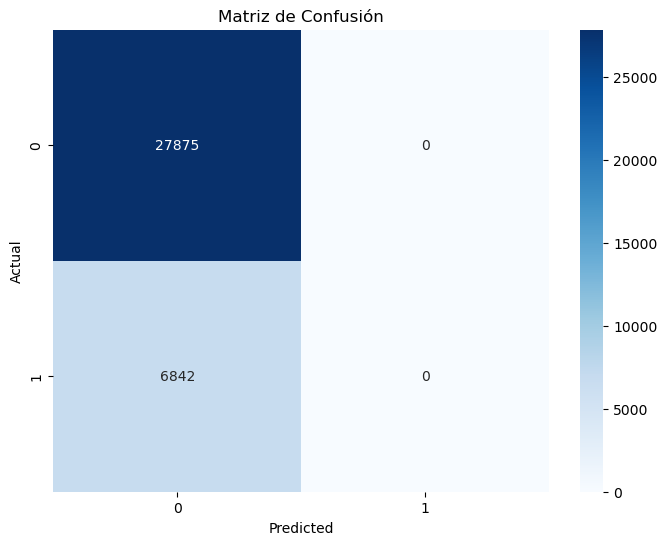

Métricas de Clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     27875
           1       1.00      0.00      0.00      6842

    accuracy                           0.80     34717
   macro avg       0.90      0.50      0.45     34717
weighted avg       0.84      0.80      0.72     34717



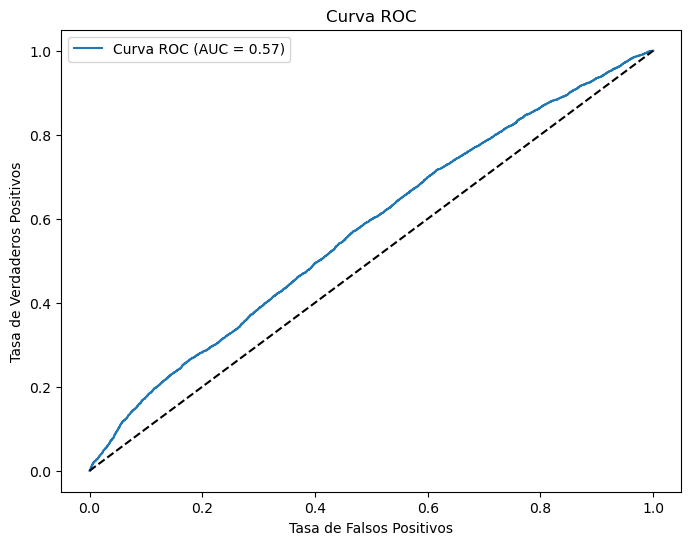

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#Convertir los valores de y_test a binarios numéricos
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

#Convertir los valores de y_pred a binarios numéricos

y_pred_binary = le.transform(y_pred)

#Calcular la matriz de confusión

cm = confusion_matrix(y_test_binary, y_pred_binary)

#Calcular métricas de clasificación (precisión, recall, F1-score)

classification_metrics = classification_report(y_test_binary, y_pred_binary, zero_division=1) # Agregar el parámetro zero_division

#Calcular la curva ROC y el área bajo la curva (AUC)

y_pred_prob = logistic_regression.predict_proba(X_test)[:, 1] # Probabilidad de clase positiva
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
auc = roc_auc_score(y_test_binary, y_pred_prob)

#Visualizar la matriz de confusión

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

#Visualizar las métricas de clasificación

print("Métricas de Clasificación:")
print(classification_metrics)

#Visualizar la curva ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para predecir la probabilidad de que una variable categórica binaria dependiente (variable de respuesta) esté asociada con una o más variables independientes (variables predictoras). Aunque se llama "regresión", en realidad es un método de clasificación.

Aquí te explico cómo funciona la regresión logística paso a paso:

    Conjunto de datos: Comenzamos con un conjunto de datos etiquetados, donde tenemos una variable objetivo binaria (0 o 1) y una o más variables independientes que se utilizarán para predecir la variable objetivo.

    Función logística: La regresión logística utiliza una función logística, también conocida como función sigmoide, para modelar la relación entre las variables independientes y la probabilidad de que la variable objetivo sea igual a 1. La función logística tiene la siguiente forma:

    f(x) = 1 / (1 + e^(-x))

    Aquí, "x" representa la combinación lineal de las variables independientes ponderadas por los coeficientes de regresión.

    Ajuste de parámetros: El objetivo es ajustar los coeficientes de regresión de manera que maximicen la probabilidad de observar los datos reales en el conjunto de entrenamiento. Esto se realiza mediante un proceso llamado "máxima verosimilitud".

    Estimación de probabilidades: Una vez que se ajustan los coeficientes, podemos utilizar la función logística para estimar la probabilidad de que la variable objetivo sea igual a 1 para cada observación en el conjunto de datos. Si la probabilidad estimada es mayor o igual a un umbral predeterminado (por ejemplo, 0.5), clasificamos la observación como "1"; de lo contrario, la clasificamos como "0".

    Evaluación y predicción: Finalmente, podemos evaluar el rendimiento del modelo utilizando métricas como la precisión, la sensibilidad y la especificidad. Una vez que estamos satisfechos con el rendimiento del modelo, podemos usarlo para realizar predicciones en nuevos conjuntos de datos no vistos.

Es importante destacar que la regresión logística asume una relación lineal entre las variables independientes y la función logística. Si hay una relación no lineal, se pueden utilizar técnicas como la transformación de variables o la inclusión de términos polinómicos para capturar relaciones más complejas.

En resumen, la regresión logística utiliza una función logística para modelar la relación entre las variables independientes y la probabilidad de una variable objetivo binaria. Los coeficientes del modelo se ajustan mediante el método de máxima verosimilitud, y luego se utilizan para estimar las probabilidades y realizar predicciones.

# SVM

In [24]:
DataS = df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Definir las características (X) y la variable objetivo (y)
X = DataP.select_dtypes(include='number')
y = DataP['PotentialFraud']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA
pca = PCA(n_components=12)  # Especificar el número de componentes principales deseado
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = svm.score(X_test, y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Generar predicciones para la variable y
y_pred_all = svm.predict(X_pca)
DataP['PotentialFraud'] = y_pred_all

# Imprimir la predicción
print("Predicción de la variable y:")
print(y_pred_all)


In [ ]:
# Realizar evaluación utilizando 10-fold cross-validation estratificado
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []

# Calcular el promedio de las precisiones obtenidas
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Precisión promedio del modelo: {:.2f}%".format(average_accuracy * 100))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_precision_recall_curve, plot_roc_curve

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular métricas de evaluación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
labels = np.unique(y)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Matriz de Confusión',
       ylabel='Etiqueta Real',
       xlabel='Etiqueta Predicha')
plt.show()

# Visualizar curva de precisión y recall
plot_precision_recall_curve(svm, X_test, y_test)
plt.title('Curva de Precisión y Recall')
plt.show()

# Visualizar curva ROC
plot_roc_curve(svm, X_test, y_test)
plt.title('Curva ROC')
plt.show()


Una Máquina de Vectores de Soporte (SVM, por sus siglas en inglés) es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión. Su objetivo principal es encontrar un hiperplano en un espacio de alta dimensión que pueda separar los puntos de datos en diferentes categorías.

Aquí hay una explicación básica de cómo funciona una SVM en el contexto de la clasificación:

    Preparación de los datos: En primer lugar, se deben preparar los datos de entrenamiento para el algoritmo SVM. Esto incluye asegurarse de que los datos sean numéricos y que las etiquetas de clase estén adecuadamente asignadas.

    Selección del núcleo (kernel): Un kernel es una función que se utiliza para calcular las similitudes entre los pares de puntos de datos en el espacio de características. La elección del kernel depende del tipo de datos y del problema en cuestión. Algunos ejemplos comunes de kernels son el lineal, el polinomial y el radial (también conocido como RBF).

    Creación del hiperplano de separación: Una vez que se ha seleccionado el kernel, se procede a entrenar el modelo SVM para encontrar el hiperplano de separación óptimo. El objetivo es maximizar el margen entre las muestras de entrenamiento más cercanas de diferentes clases. Estas muestras son conocidas como vectores de soporte.

    Proyección en un espacio de alta dimensión: En algunos casos, los datos pueden no ser linealmente separables en el espacio de características original. Para superar esta limitación, SVM utiliza una técnica llamada "mapeo" o "proyección" de los datos en un espacio de mayor dimensión, donde es más probable que sean separables linealmente.

    Clasificación: Una vez que se ha encontrado el hiperplano de separación óptimo, se utiliza para clasificar nuevos puntos de datos. Los puntos que se encuentran en un lado del hiperplano pertenecen a una clase, mientras que los puntos del otro lado pertenecen a otra clase.

Es importante destacar que, en casos en los que los datos no sean linealmente separables, se pueden aplicar técnicas como la relajación del margen (soft margin) o el uso de kernels no lineales para permitir una separación más flexible.

En resumen, una SVM es un algoritmo que utiliza vectores de soporte y un hiperplano de separación para clasificar puntos de datos. A través del uso de kernels, puede manejar datos no linealmente separables y proyectarlos en un espacio de alta dimensión para una mejor separación.

# Red Neuronal

In [ ]:
DataN = df

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Definir las características (X) y la variable objetivo (y)
X = DataN.select_dtypes(include='number')
y = DataN['PotentialFraud']

# Transformar la variable objetivo en 2 clases
y_binary = y.apply(lambda x: 0 if x == 0 else 1)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

# Convertir los datos de numpy a tensores de PyTorch
X_tensor = torch.tensor(X_pca, dtype=torch.float32)
y_tensor = torch.tensor(y_binary.values, dtype=torch.long)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_valtest, y_train, y_valtest = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

# Definir la arquitectura de la red neuronal
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Crear el modelo de red neuronal
model = NeuralNet(X_train.shape[1])

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
num_epochs = 10
batch_size = 32

best_val_accuracy = 0.0
best_model = None

for epoch in range(num_epochs):
    model.train()  # Modo de entrenamiento
    for i in range(0, X_train.shape[0], batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluar el rendimiento en el conjunto de validación
    model.eval()  # Modo de evaluación
    with torch.no_grad():
        val_outputs = model(X_val)
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_accuracy = (val_predicted == y_val).sum().item() / y_val.size(0)

    # Guardar el mejor modelo basado en la precisión en el conjunto de validación
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model.state_dict()

    print("Epoch [{}/{}], Loss: {:.4f}, Validation Accuracy: {:.2f}%"
          .format(epoch+1, num_epochs, loss.item(), val_accuracy * 100))

# Cargar el mejor modelo obtenido durante el entrenamiento
model.load_state_dict(best_model)

# Evaluar el rendimiento del modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
    print("Precisión en el conjunto de prueba: {:.2f}%".format(test_accuracy * 100))

# Realizar predicciones en el conjunto completo
model.eval()
with torch.no_grad():
    all_outputs = model(X_tensor)
    _, predicted_all = torch.max(all_outputs.data, 1)
    DataP['PotentialFraud'] = predicted_all.numpy()

# Imprimir la predicción
print("Predicción de la variable y:")
print(predicted_all.numpy())


Epoch [1/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [2/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [3/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [4/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [5/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [6/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [7/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [8/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [9/10], Loss: 0.3133, Validation Accuracy: 100.00%
Epoch [10/10], Loss: 0.3133, Validation Accuracy: 100.00%
Precisión en el conjunto de prueba: 100.00%
Predicción de la variable y:
[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Definir las características (X) y la variable objetivo (y)
X = DataN.select_dtypes(include='number')
y = DataN['PotentialFraud']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)
mlp.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = mlp.score(X_test, y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Generar predicciones para la variable y
y_pred_all = mlp.predict(X_pca)
DataP['PotentialFraud'] = y_pred_all

# Imprimir la predicción
print("Predicción de la variable y:")
print(y_pred_all)


Precisión del modelo: 100.00%
Predicción de la variable y:
[1 1 1 ... 1 1 1]


In [ ]:
# Realizar la evaluación de 10-Fold Cross-Validation estratificado
scores = cross_val_score(mlp, X_pca, y, cv=10, scoring='accuracy')

# Imprimir los resultados de cada fold y el promedio
print("Resultados de la validación cruzada estratificada de 10-Fold:")
for fold, score in enumerate(scores, 1):
    print("Fold {}: {:.2f}%".format(fold, score * 100))
print("Precisión promedio: {:.2f}%".format(scores.mean() * 100))

Resultados de la validación cruzada estratificada de 10-Fold:
Fold 1: 100.00%
Fold 2: 100.00%
Fold 3: 100.00%
Fold 4: 100.00%
Fold 5: 100.00%
Fold 6: 100.00%
Fold 7: 100.00%
Fold 8: 100.00%
Fold 9: 100.00%
Fold 10: 100.00%
Precisión promedio: 100.00%


Precisión: 100.00%
Recall: 100.00%
F1-Score: 100.00%
Matriz de confusión:
[[34717]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


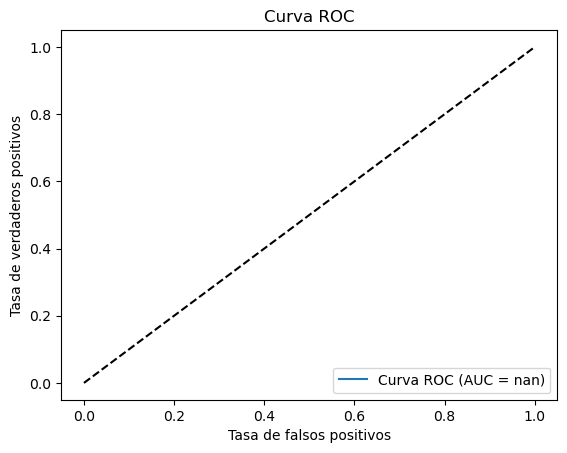

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Precisión: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:")
print(confusion)

# Graficar la curva ROC
probas = mlp.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Un perceptrón multicapa, también conocido como red neuronal de alimentación hacia adelante, es una arquitectura de red neuronal artificial compuesta por múltiples capas de neuronas interconectadas. Cada capa de neuronas se compone de un conjunto de unidades llamadas neuronas o nodos, que están organizadas en capas de entrada, capas ocultas y capa de salida.

Aquí hay una explicación básica de cómo funciona un perceptrón multicapa:

    Capa de entrada: La capa de entrada es la primera capa del perceptrón multicapa y se compone de neuronas que representan las características de entrada de los datos. Cada neurona en esta capa se conecta con todas las neuronas de la siguiente capa, conocida como capa oculta.

    Capas ocultas: Las capas ocultas se encuentran entre la capa de entrada y la capa de salida. Son responsables de procesar y transformar la información de entrada. Cada neurona en una capa oculta toma las salidas de las neuronas de la capa anterior, realiza una combinación lineal ponderada de las entradas y aplica una función de activación no lineal a esta combinación lineal para generar su salida. Cada capa oculta puede tener múltiples neuronas.

    Capa de salida: La capa de salida es la última capa del perceptrón multicapa y produce los resultados finales. La cantidad de neuronas en esta capa depende del problema en cuestión. Por ejemplo, en un problema de clasificación binaria, puede haber una sola neurona de salida que produzca una salida entre 0 y 1, representando la probabilidad de pertenecer a una clase determinada. En un problema de clasificación multiclase, puede haber varias neuronas de salida, donde cada una representa la probabilidad de pertenecer a una clase específica.

    Propagación hacia adelante (forward propagation): Una vez que se han establecido las conexiones y los pesos sinápticos entre las neuronas, el perceptrón multicapa realiza la propagación hacia adelante. Esto implica pasar los datos de entrada a través de la red neuronal, calculando las salidas de las neuronas en cada capa mediante la combinación lineal ponderada y la función de activación.

    Cálculo del error y retropropagación (backpropagation): Después de la propagación hacia adelante, se compara la salida producida por la red neuronal con la salida deseada. Se calcula el error, que es la diferencia entre la salida deseada y la salida real de la red. Luego, se utiliza el algoritmo de retropropagación para ajustar los pesos sinápticos en cada capa de la red, de manera que se minimice el error. El algoritmo de retropropagación utiliza la cadena de reglas y el gradiente descendente para actualizar los pesos en función del error calculado.

    Iteración y ajuste de pesos: El proceso de propagación hacia adelante y retropropagación se repite iterativamente para el conjunto de entrenamiento hasta que se alcance un criterio de parada, como un número máximo de iteraciones o un error aceptablemente bajo. Durante cada iteración, los pesos sinápticos se ajustan para mejorar el rendimiento de la red neuronal.

    Predicción: Una vez que la red neuronal ha sido entrenada y los pesos sinápticos han sido ajustados, se puede utilizar para hacer predicciones sobre nuevos datos de entrada. Se realiza la propagación hacia adelante en la red neuronal con los datos de entrada y se obtiene la salida correspondiente, que puede ser interpretada según el problema en cuestión (por ejemplo, una clase de salida en un problema de clasificación).

En resumen, un perceptrón multicapa es una red neuronal artificial compuesta por capas de neuronas interconectadas. A través de la propagación hacia adelante y la retropropagación, la red aprende a ajustar los pesos sinápticos para minimizar el error y realizar predicciones en función de los datos de entrada.